In [18]:
def get_amplitude(timeseries):
  return max(timeseries) - min(timeseries)

def get_bucketed_shift(percent_shift):
  if percent_shift < -0.1:
    return -2
  elif percent_shift < 0:
    return -1
  elif percent_shift < 0.1:
    return 1
  else:
    return 2

# center of mass shift from first half to second half. A positive value means
# center of mass increases over time.
def get_center_of_mass_shift(timeseries):
  half = int(len(timeseries)/2)
  shift = np.mean(timeseries[half:]) - np.mean(timeseries[:half])
  amplitude = get_amplitude(timeseries)
  
  scaled_shift = shift / amplitude
  return scaled_shift

# amplitude shift from first half to second half. A positive value means
# amplitude increases over time.
# Useful for distinguishing between stable focus vs node.
def get_amplitude_shift(timeseries):
  half = int(len(timeseries)/2)
  shift = get_amplitude(timeseries[half:]) - get_amplitude(timeseries[:half])
  amplitude = get_amplitude(timeseries)
  
  scaled_shift = shift / amplitude
  return scaled_shift

# Get how big the amplitude is. Useful for capturing stable focus / node.
def get_bucketed_amplitude(timeseries):
  return 1 if get_amplitude(timeseries) > 1 else 0


In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json('data/chem.json')

ggap_lo = 0.0
ggap_hi = 1.5
gsyn_lo = 0.0
gsyn_hi = 1.5
num_points = 20
n_timesteps_to_analyze = 1000
C_actual = 0.015
Gc_actual = 0.1

features_to_params = {}

for ggap in np.linspace(ggap_lo, ggap_hi, num_points):
  for gsyn in np.linspace(gsyn_lo, gsyn_hi, num_points):
    all_dynamics = simulate_until_stable(C_actual, Gc_actual, ggap, gsyn)
    stable_dynamics = all_dynamics[all_dynamics.shape[0] - n_timesteps_to_analyze:,:]
    n = stable_dynamics.shape[0]
    X = stable_dynamics - stable_dynamics.mean(axis = 0)
    pca = PCA()
    projected_X = pca.fit_transform(stable_dynamics)
    dom_mode = projected_X[:,0]
    
    center_of_mass_shift = get_bucketed_shift(get_center_of_mass_shift(dom_mode))
    amplitude_shift = get_bucketed_shift(get_amplitude_shift(dom_mode))
    bucketed_amplitude = get_bucketed_amplitude(dom_mode)
    features = (center_of_mass_shift, amplitude_shift, bucketed_amplitude)
    params = (ggap, gsyn)
    if features not in features_to_params:
      features_to_params[features] = []  
    features_to_params[features].append(params)

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.0
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.079
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.158
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.237
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.316
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.395
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.474
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.553
Loading saved results from pickle file cached_notebook_results/cached_simu

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=1.184
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=1.263
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=1.342
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=1.421
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=1.5
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.316_gsyn=0.0
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.316_gsyn=0.079
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.316_gsyn=0.158
Loading saved results from pickle file cached_notebook_resul

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.553_gsyn=0.632
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.553_gsyn=0.711
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.553_gsyn=0.789
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.553_gsyn=0.868
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.553_gsyn=0.947
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.553_gsyn=1.026
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.553_gsyn=1.105
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.553_gsyn=1.184
Loading saved results from pickle file cached_notebook_r

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.079
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.158
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.237
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.316
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.395
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.474
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.553
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.868_gsyn=0.632
Loading saved results from pickle file cached_notebook_r

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=1.026
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=1.105
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=1.184
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=1.263
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=1.342
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=1.421
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.105_gsyn=1.5
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.184_gsyn=0.0
Loading saved results from pickle file cached_notebook_resul

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.421_gsyn=0.711
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.421_gsyn=0.789
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.421_gsyn=0.868
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.421_gsyn=0.947
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.421_gsyn=1.026
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.421_gsyn=1.105
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.421_gsyn=1.184
Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=1.421_gsyn=1.263
Loading saved results from pickle file cached_notebook_r

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.0
1 Center of mass shift bucket = -2, amplitude shift bucket = -2, amplitude = bucket 0, number of params = 92
Sample parameter. ggap 0.0, gsyn 0.0
Center of mass shift = -0.30
Amplitude shift = -0.96
Amplitude = 0.00


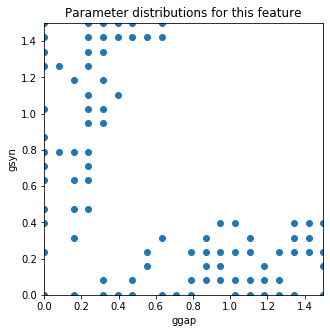

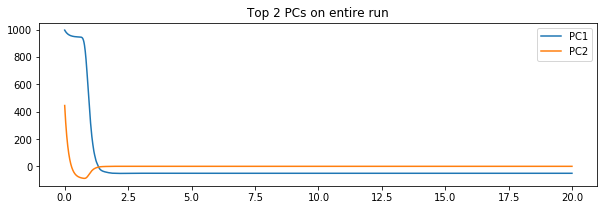

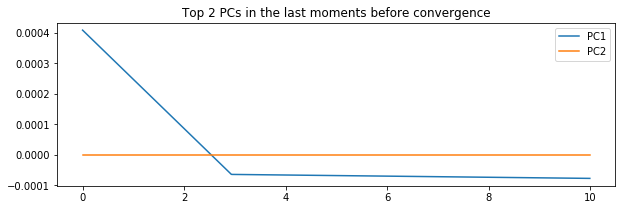

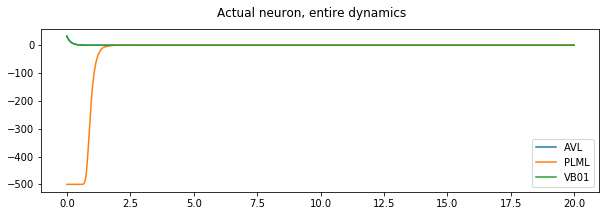

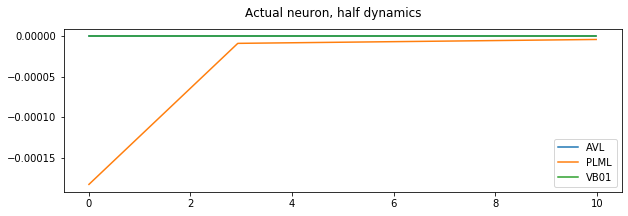

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.079
2 Center of mass shift bucket = 2, amplitude shift bucket = 2, amplitude = bucket 0, number of params = 5
Sample parameter. ggap 0.0, gsyn 0.07894736842105263
Center of mass shift = 0.21
Amplitude shift = 0.18
Amplitude = 0.05


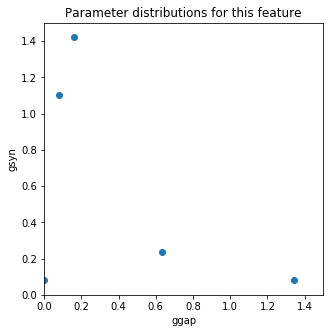

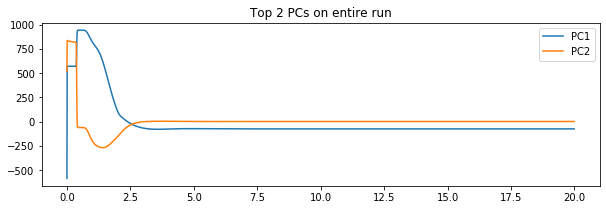

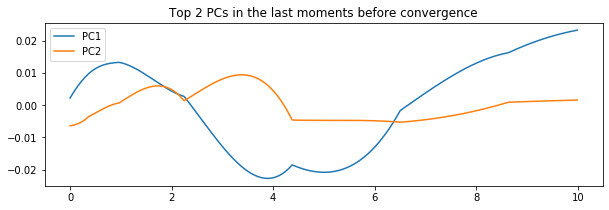

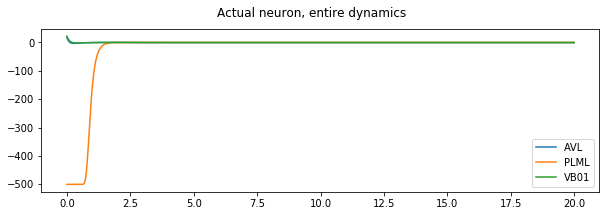

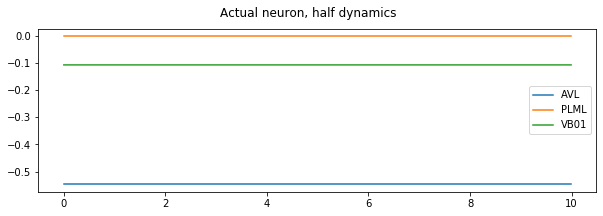

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.158
3 Center of mass shift bucket = -1, amplitude shift bucket = -2, amplitude = bucket 0, number of params = 29
Sample parameter. ggap 0.0, gsyn 0.15789473684210525
Center of mass shift = -0.05
Amplitude shift = -0.90
Amplitude = 0.02


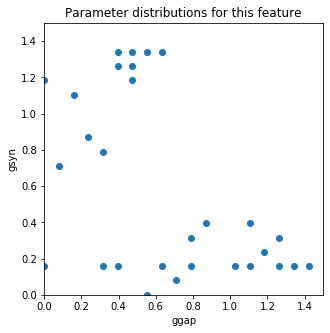

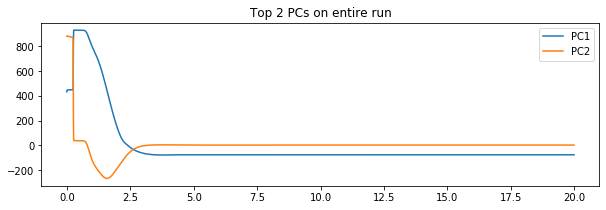

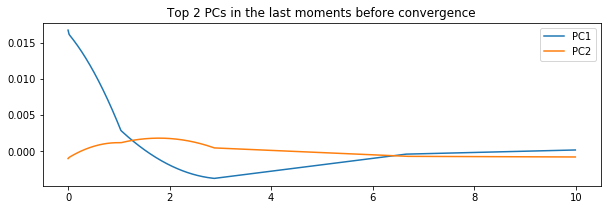

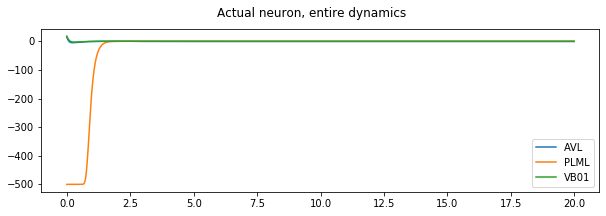

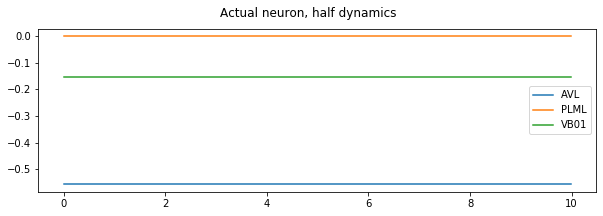

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.316
4 Center of mass shift bucket = 1, amplitude shift bucket = -2, amplitude = bucket 0, number of params = 14
Sample parameter. ggap 0.0, gsyn 0.3157894736842105
Center of mass shift = 0.03
Amplitude shift = -0.53
Amplitude = 0.00


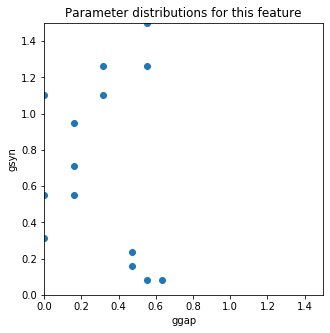

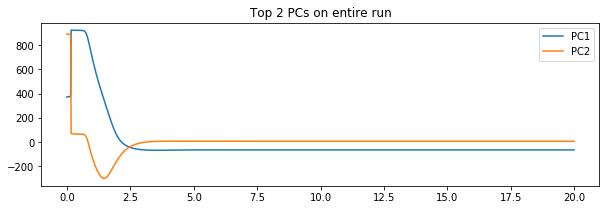

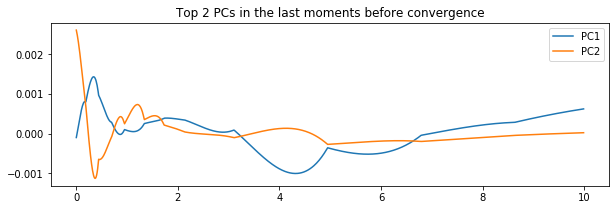

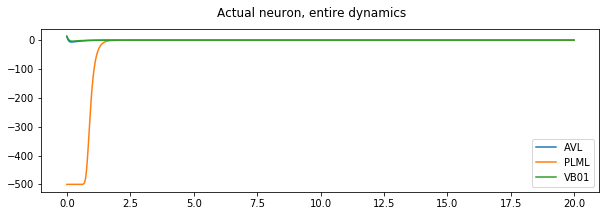

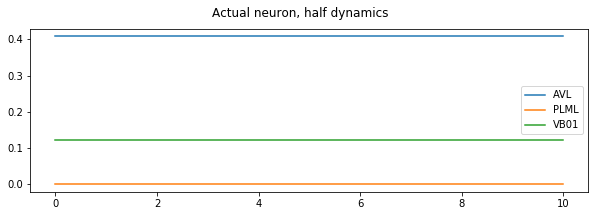

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.0_gsyn=0.947
5 Center of mass shift bucket = 2, amplitude shift bucket = 1, amplitude = bucket 0, number of params = 4
Sample parameter. ggap 0.0, gsyn 0.9473684210526315
Center of mass shift = 0.50
Amplitude shift = 0.01
Amplitude = 0.13


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


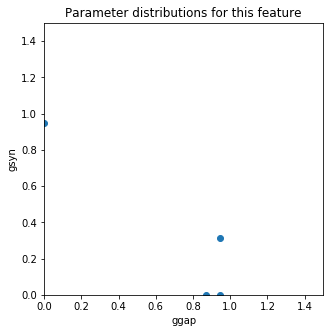

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


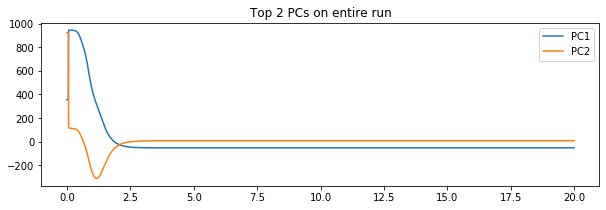

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


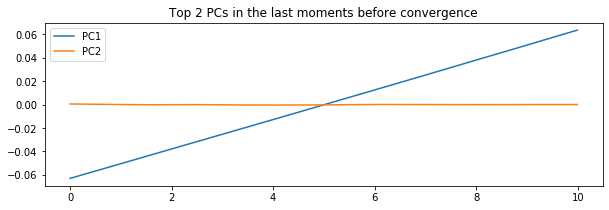

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


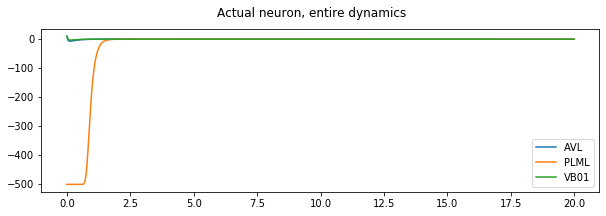

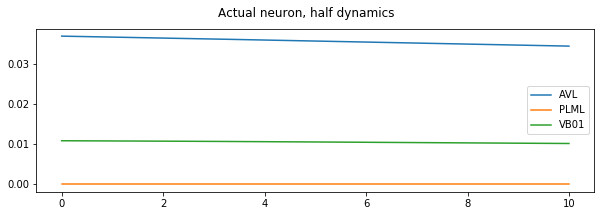

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=0.0
6 Center of mass shift bucket = 2, amplitude shift bucket = -2, amplitude = bucket 0, number of params = 9
Sample parameter. ggap 0.07894736842105263, gsyn 0.0
Center of mass shift = 0.16
Amplitude shift = -0.66
Amplitude = 0.00


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


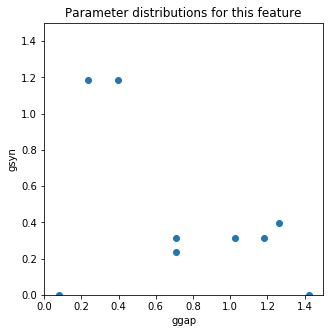

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


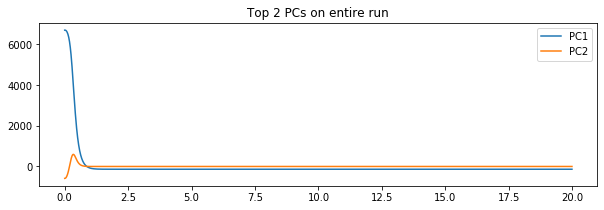

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


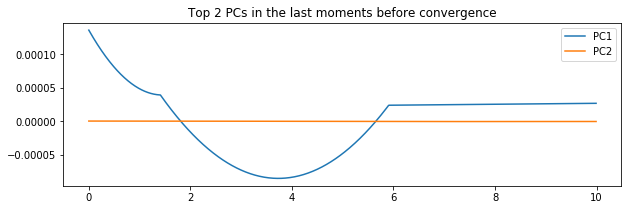

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


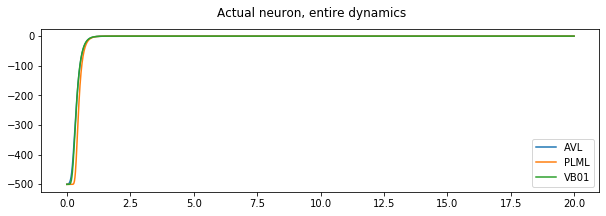

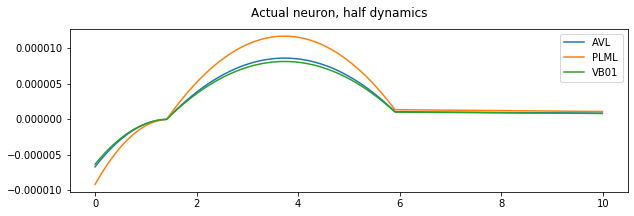

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=0.079
7 Center of mass shift bucket = -1, amplitude shift bucket = 1, amplitude = bucket 1, number of params = 32
Sample parameter. ggap 0.07894736842105263, gsyn 0.07894736842105263
Center of mass shift = -0.00
Amplitude shift = 0.00
Amplitude = 1155.63


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


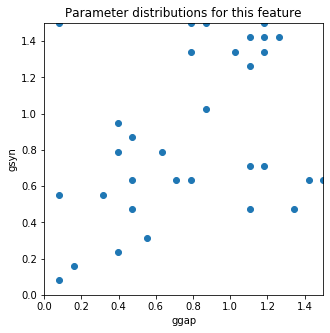

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


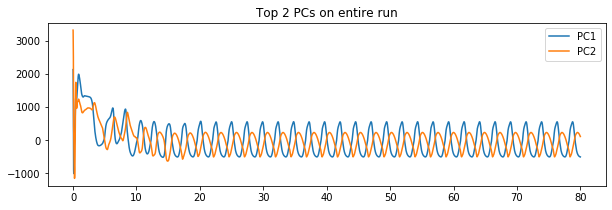

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


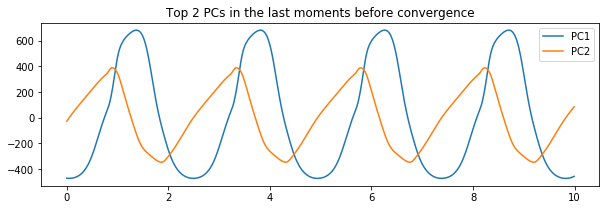

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


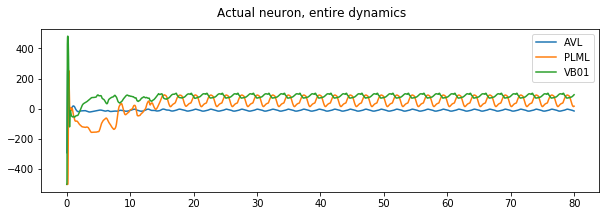

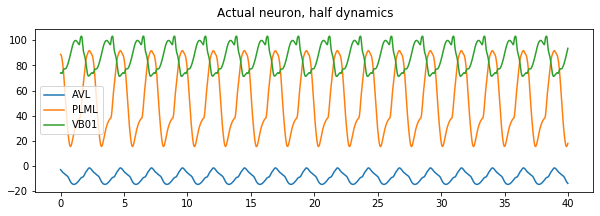

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=0.158
8 Center of mass shift bucket = -1, amplitude shift bucket = -1, amplitude = bucket 1, number of params = 54
Sample parameter. ggap 0.07894736842105263, gsyn 0.15789473684210525
Center of mass shift = -0.04
Amplitude shift = -0.00
Amplitude = 1843.47


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


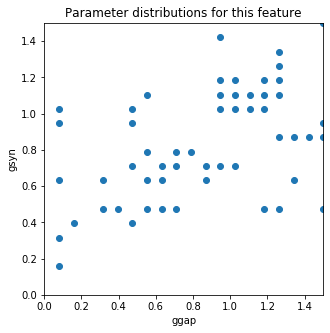

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


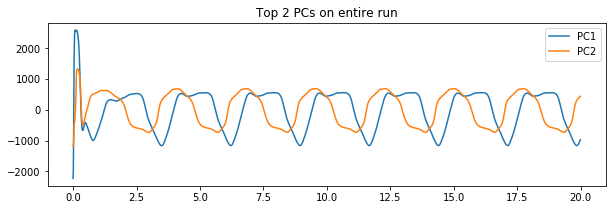

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


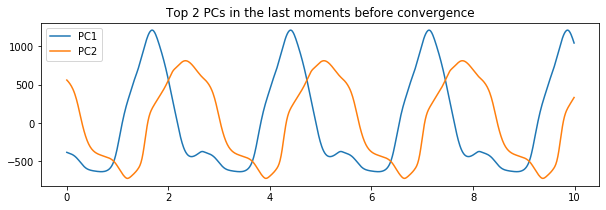

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


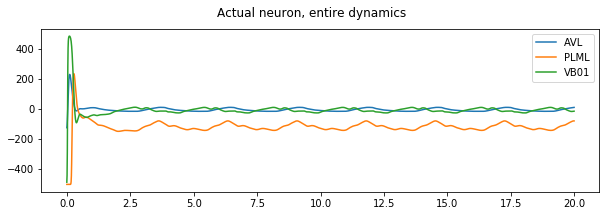

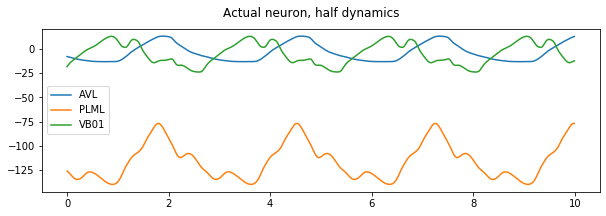

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=0.237
9 Center of mass shift bucket = 1, amplitude shift bucket = -1, amplitude = bucket 1, number of params = 47
Sample parameter. ggap 0.07894736842105263, gsyn 0.23684210526315788
Center of mass shift = 0.00
Amplitude shift = -0.00
Amplitude = 1722.49


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


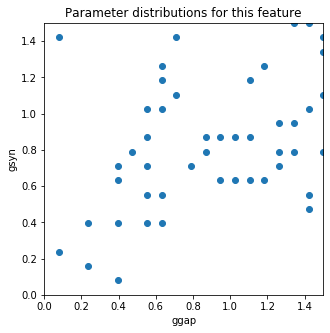

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


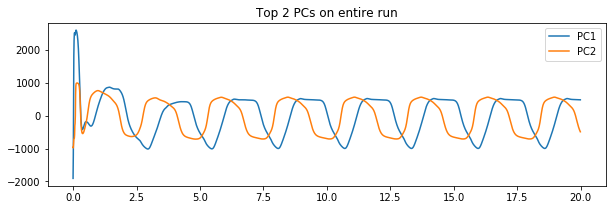

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


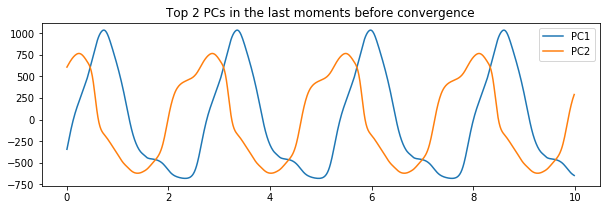

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


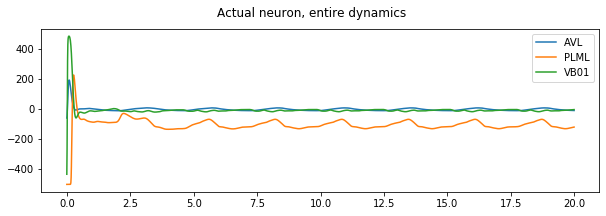

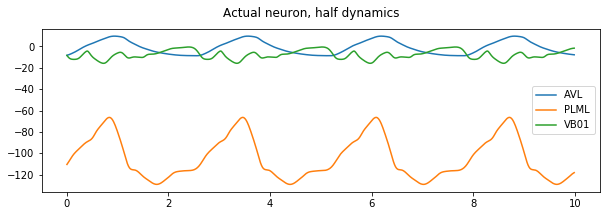

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=0.395
10 Center of mass shift bucket = 1, amplitude shift bucket = 1, amplitude = bucket 1, number of params = 40
Sample parameter. ggap 0.07894736842105263, gsyn 0.39473684210526316
Center of mass shift = 0.03
Amplitude shift = 0.00
Amplitude = 1329.82


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


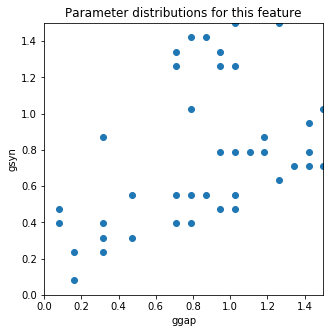

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


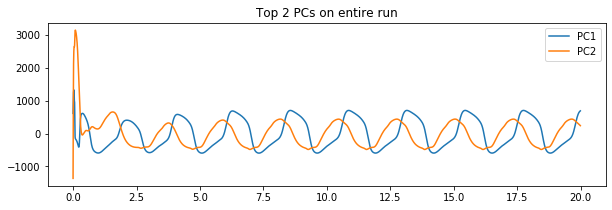

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


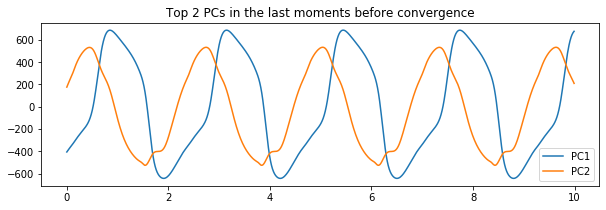

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


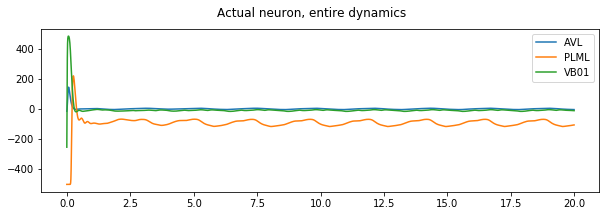

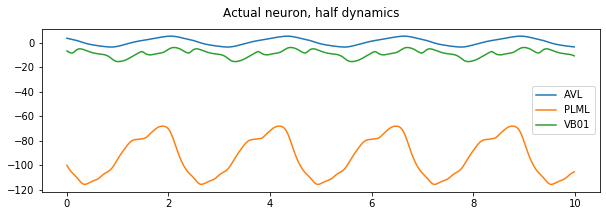

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=0.868
11 Center of mass shift bucket = -2, amplitude shift bucket = -2, amplitude = bucket 1, number of params = 2
Sample parameter. ggap 0.07894736842105263, gsyn 0.8684210526315789
Center of mass shift = -0.14
Amplitude shift = -0.96
Amplitude = 1.04


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


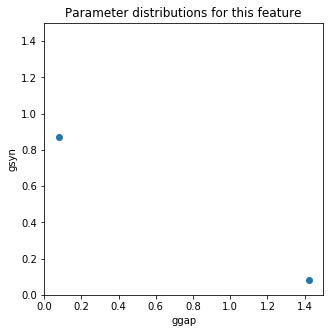

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


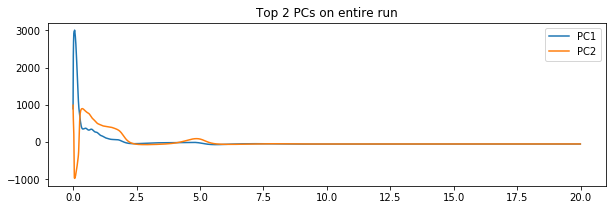

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


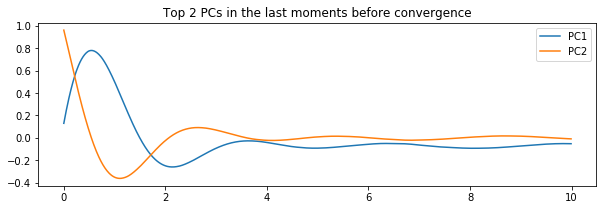

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


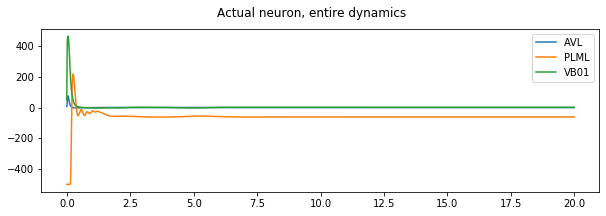

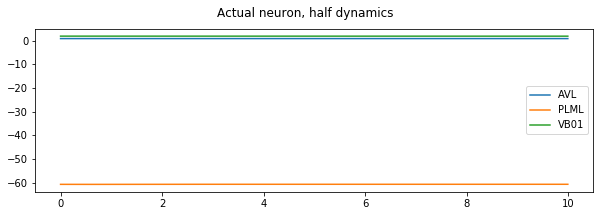

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=1.184
12 Center of mass shift bucket = 1, amplitude shift bucket = -2, amplitude = bucket 1, number of params = 4
Sample parameter. ggap 0.07894736842105263, gsyn 1.1842105263157894
Center of mass shift = 0.01
Amplitude shift = -0.16
Amplitude = 3.30


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


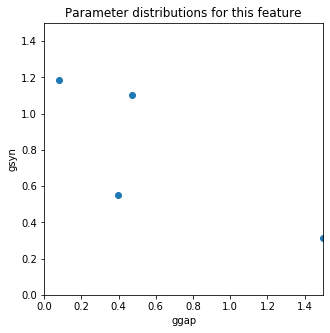

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


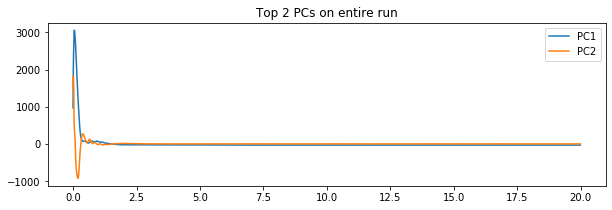

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


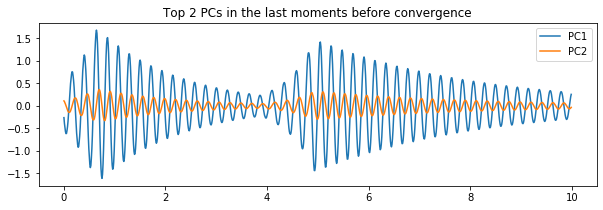

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


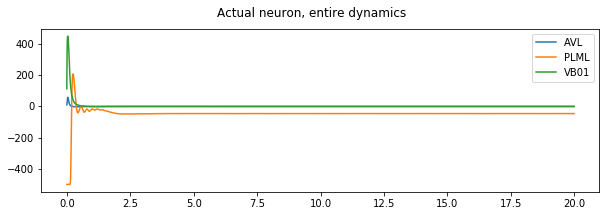

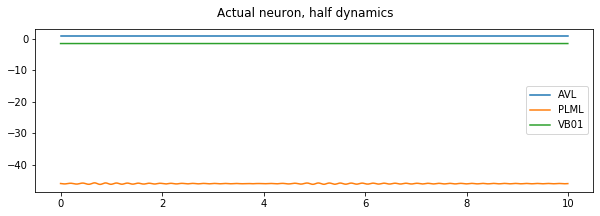

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.079_gsyn=1.342
13 Center of mass shift bucket = -1, amplitude shift bucket = 2, amplitude = bucket 1, number of params = 1
Sample parameter. ggap 0.07894736842105263, gsyn 1.3421052631578947
Center of mass shift = -0.00
Amplitude shift = 0.11
Amplitude = 2.83


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


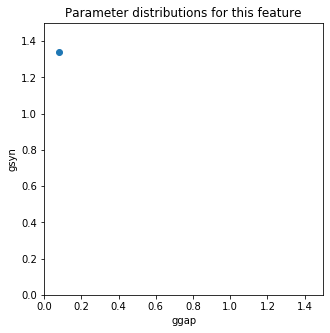

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


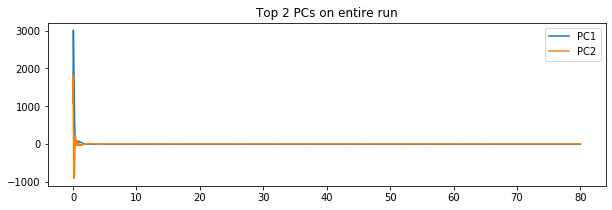

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


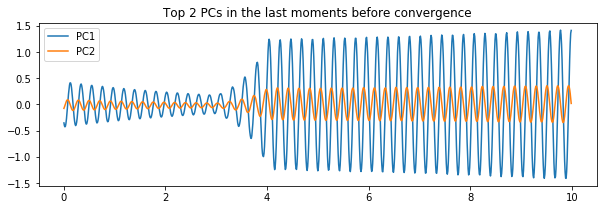

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


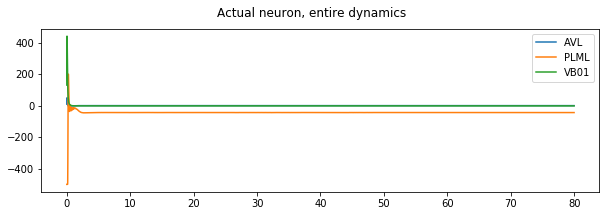

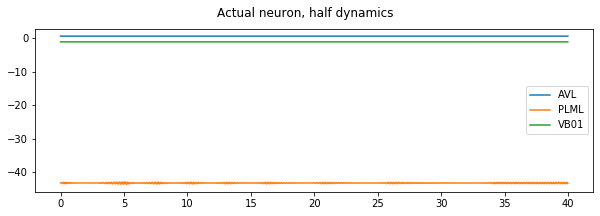

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.158_gsyn=0.868
14 Center of mass shift bucket = 1, amplitude shift bucket = 2, amplitude = bucket 0, number of params = 4
Sample parameter. ggap 0.15789473684210525, gsyn 0.8684210526315789
Center of mass shift = 0.00
Amplitude shift = 0.38
Amplitude = 0.51


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


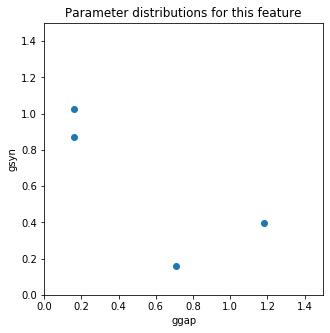

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


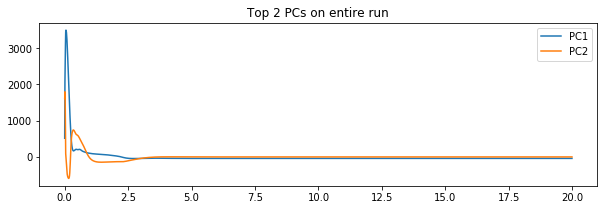

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


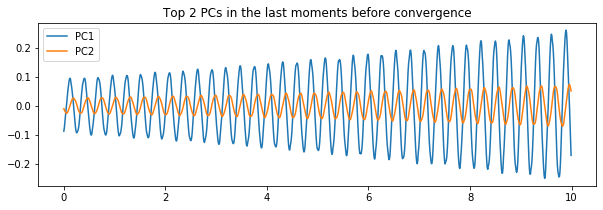

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


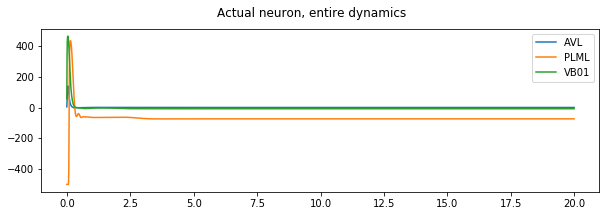

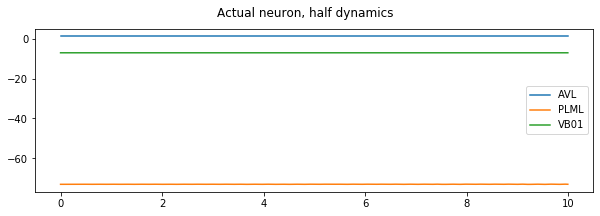

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.158_gsyn=1.263
15 Center of mass shift bucket = 2, amplitude shift bucket = 2, amplitude = bucket 1, number of params = 2
Sample parameter. ggap 0.15789473684210525, gsyn 1.263157894736842
Center of mass shift = 0.33
Amplitude shift = 0.72
Amplitude = 417.76


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


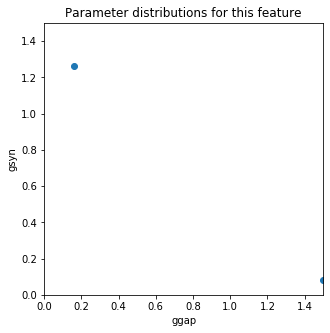

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


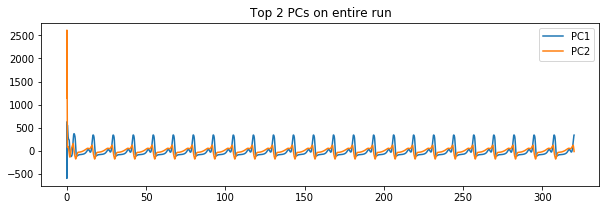

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


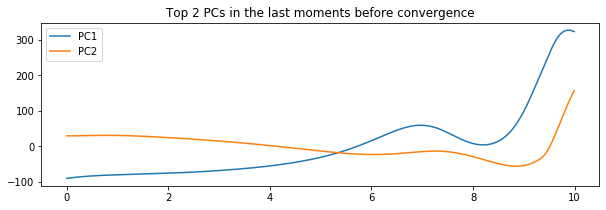

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


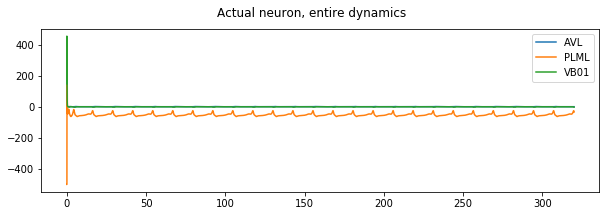

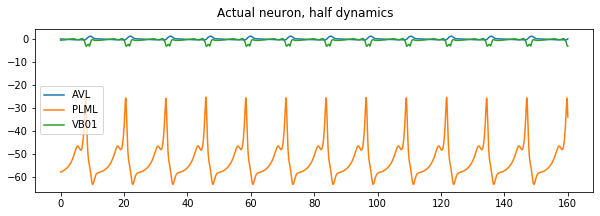

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.158_gsyn=1.342
16 Center of mass shift bucket = 2, amplitude shift bucket = -2, amplitude = bucket 1, number of params = 1
Sample parameter. ggap 0.15789473684210525, gsyn 1.3421052631578947
Center of mass shift = 0.17
Amplitude shift = -0.11
Amplitude = 1.77


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


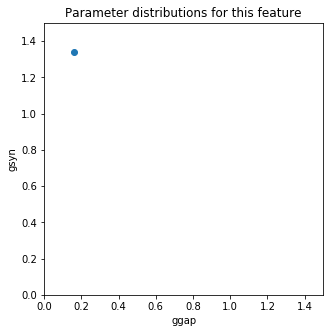

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


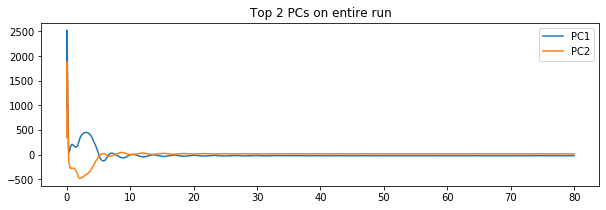

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


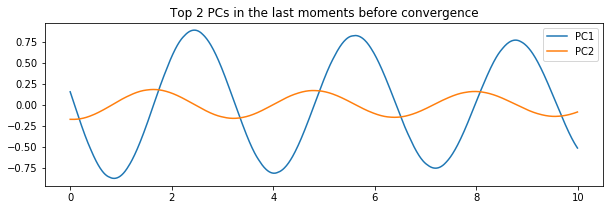

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


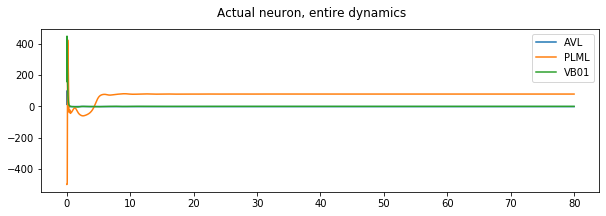

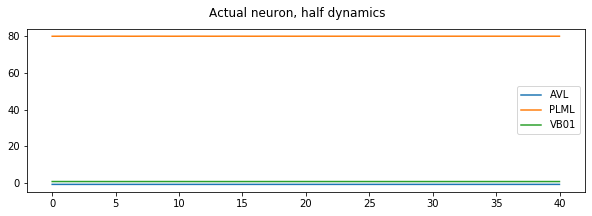

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.158_gsyn=1.5
17 Center of mass shift bucket = -2, amplitude shift bucket = -1, amplitude = bucket 0, number of params = 2
Sample parameter. ggap 0.15789473684210525, gsyn 1.5
Center of mass shift = -0.50
Amplitude shift = -0.00
Amplitude = 0.00


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


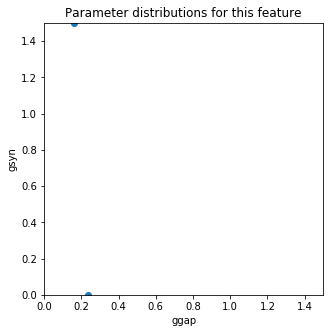

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


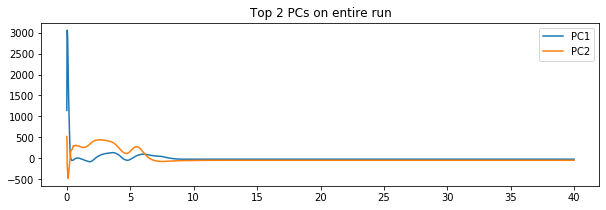

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


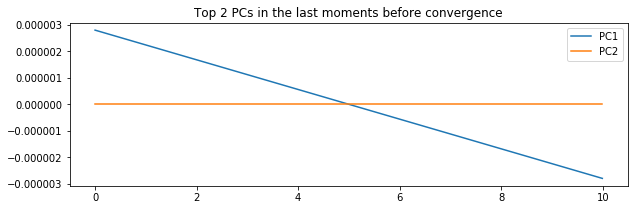

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


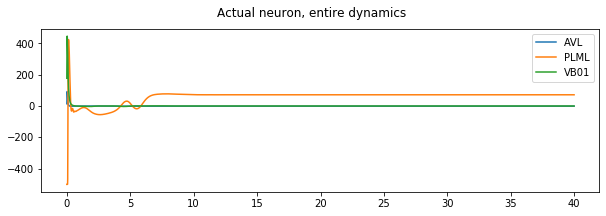

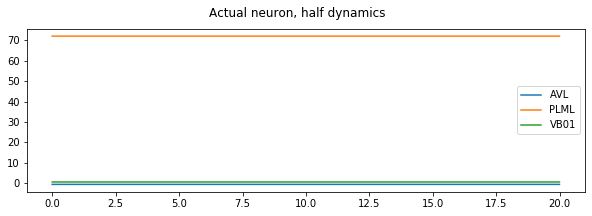

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=0.079
18 Center of mass shift bucket = 2, amplitude shift bucket = 1, amplitude = bucket 1, number of params = 7
Sample parameter. ggap 0.23684210526315788, gsyn 0.07894736842105263
Center of mass shift = 0.16
Amplitude shift = 0.02
Amplitude = 927.51


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


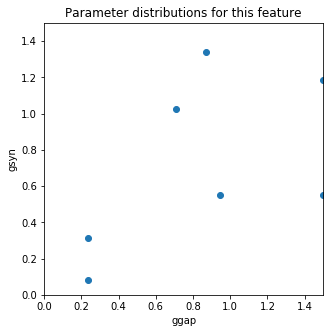

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


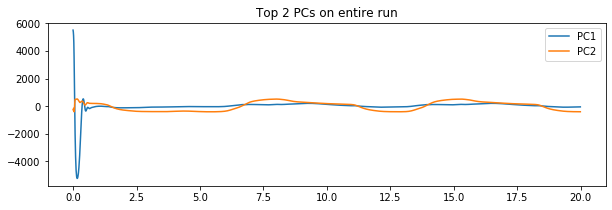

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


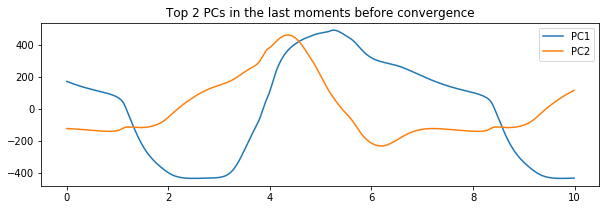

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


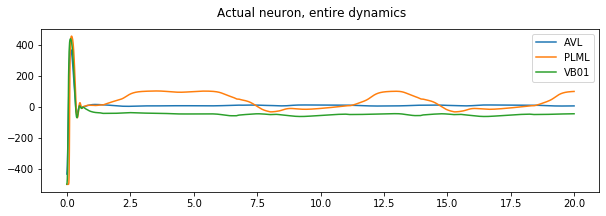

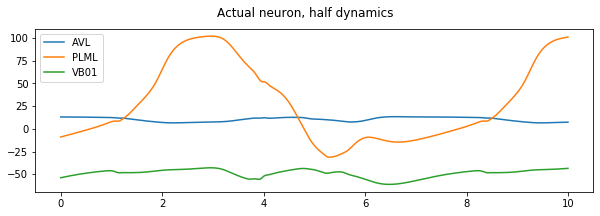

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=0.237
19 Center of mass shift bucket = -2, amplitude shift bucket = 1, amplitude = bucket 1, number of params = 9
Sample parameter. ggap 0.23684210526315788, gsyn 0.23684210526315788
Center of mass shift = -0.17
Amplitude shift = 0.01
Amplitude = 877.40


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


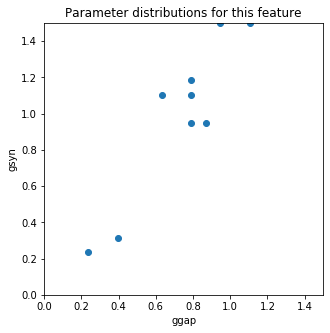

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


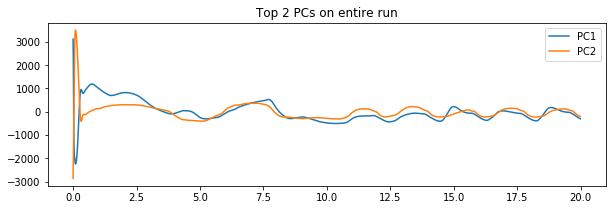

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


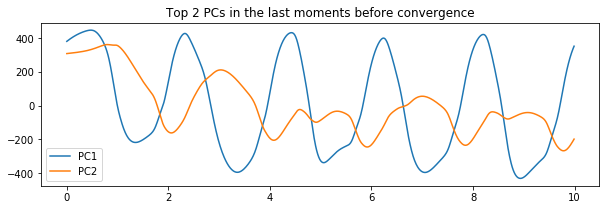

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


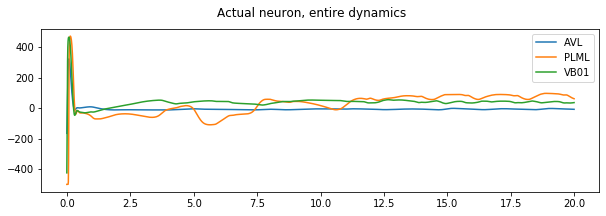

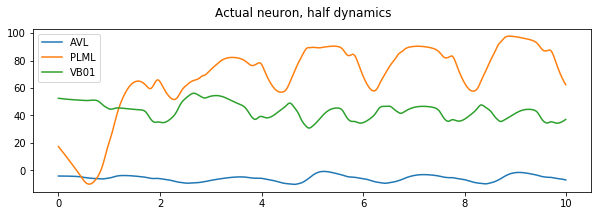

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.237_gsyn=0.553
20 Center of mass shift bucket = -2, amplitude shift bucket = -1, amplitude = bucket 1, number of params = 17
Sample parameter. ggap 0.23684210526315788, gsyn 0.5526315789473684
Center of mass shift = -0.11
Amplitude shift = -0.00
Amplitude = 1372.00


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


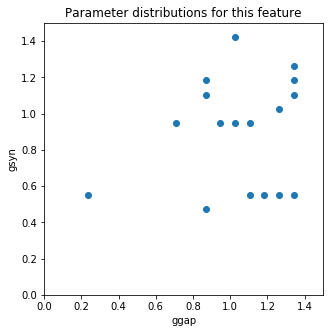

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


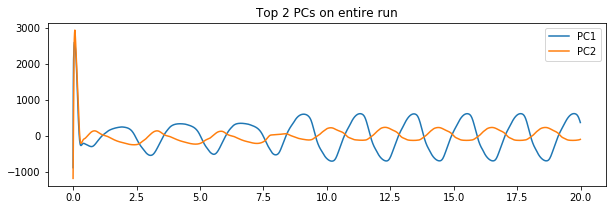

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


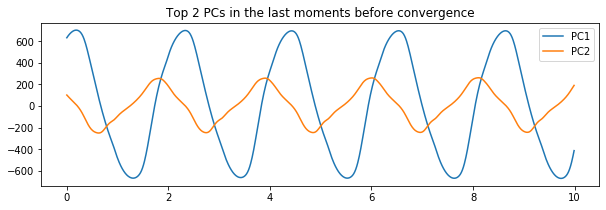

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


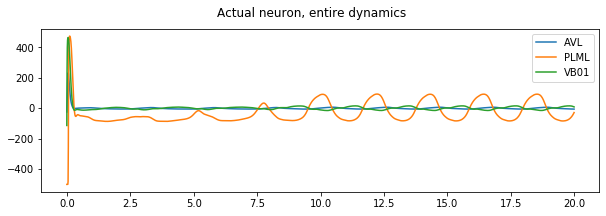

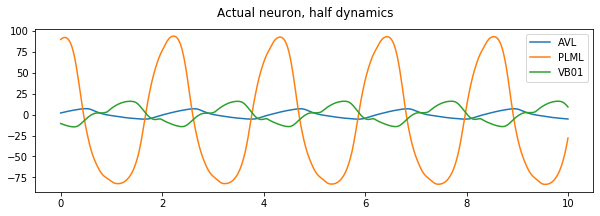

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.316_gsyn=0.711
21 Center of mass shift bucket = 2, amplitude shift bucket = -1, amplitude = bucket 1, number of params = 23
Sample parameter. ggap 0.3157894736842105, gsyn 0.7105263157894737
Center of mass shift = 0.11
Amplitude shift = -0.00
Amplitude = 1029.19


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


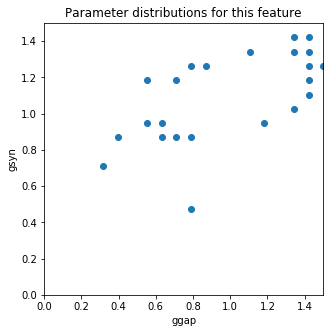

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


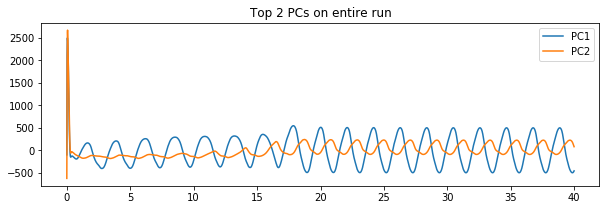

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


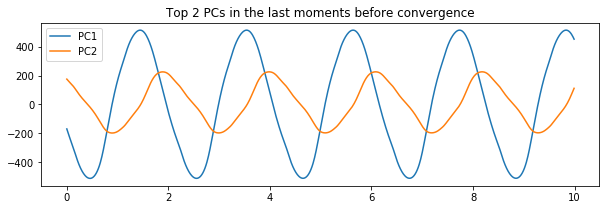

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


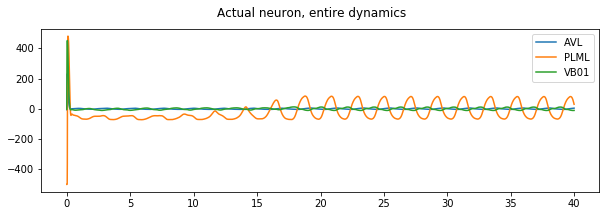

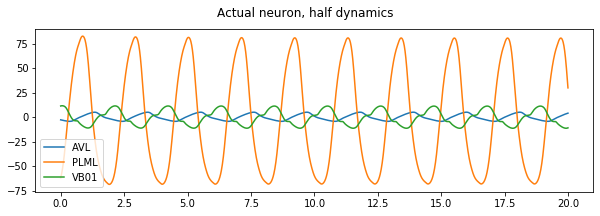

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.395_gsyn=1.026
22 Center of mass shift bucket = -2, amplitude shift bucket = 2, amplitude = bucket 1, number of params = 1
Sample parameter. ggap 0.39473684210526316, gsyn 1.026315789473684
Center of mass shift = -0.14
Amplitude shift = 0.14
Amplitude = 2.28


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


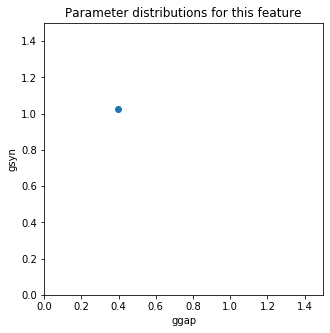

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


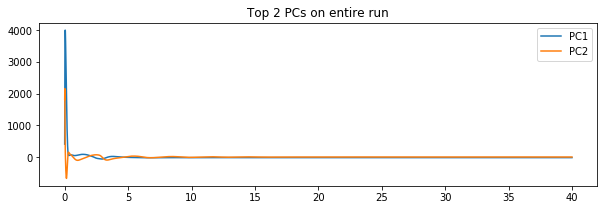

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


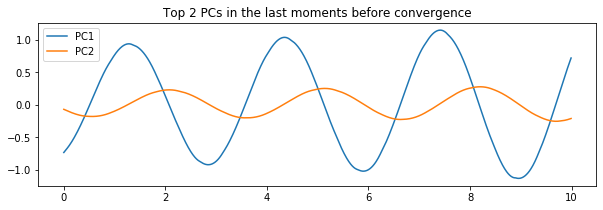

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


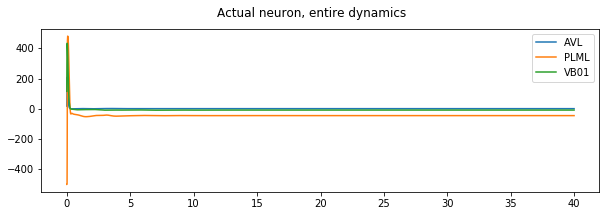

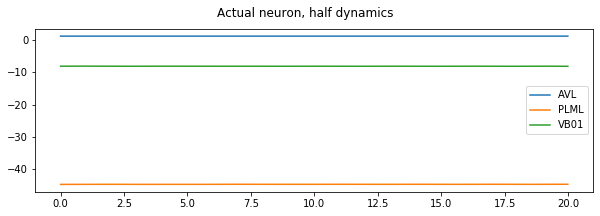

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.711_gsyn=1.5
23 Center of mass shift bucket = 2, amplitude shift bucket = -1, amplitude = bucket 0, number of params = 1
Sample parameter. ggap 0.7105263157894737, gsyn 1.5
Center of mass shift = 0.50
Amplitude shift = -0.00
Amplitude = 0.00


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


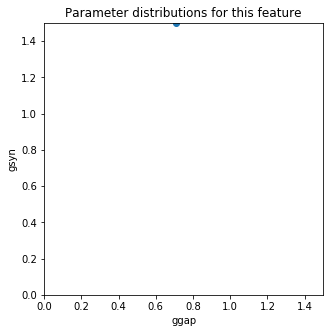

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


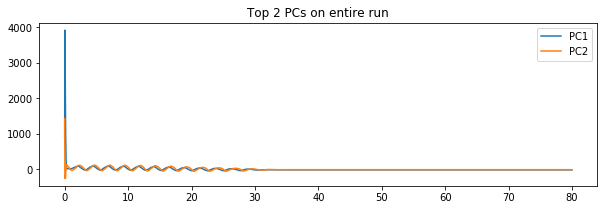

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


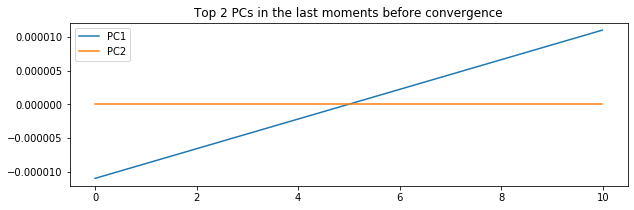

/home/stephen/Documents/code/c-elegans-interactome-analysis/util/plot_util.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))


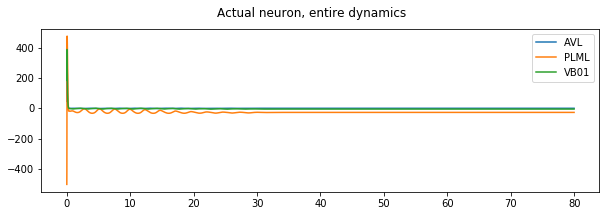

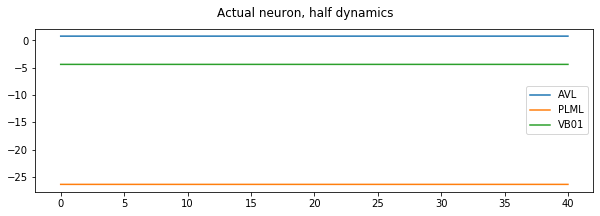

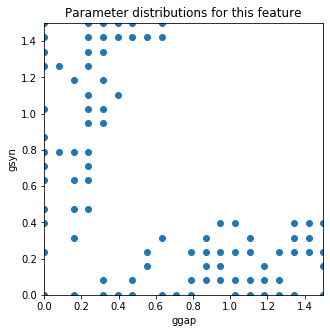

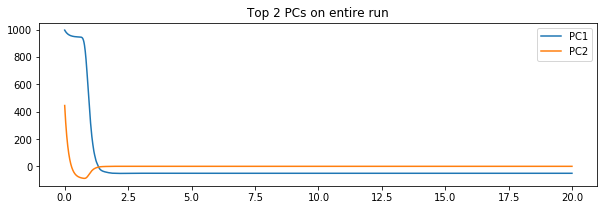

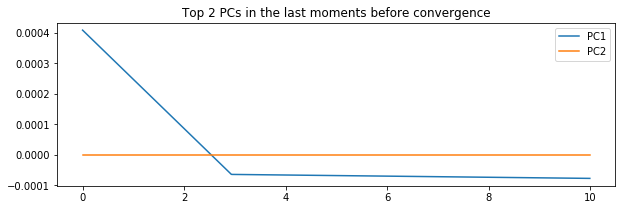

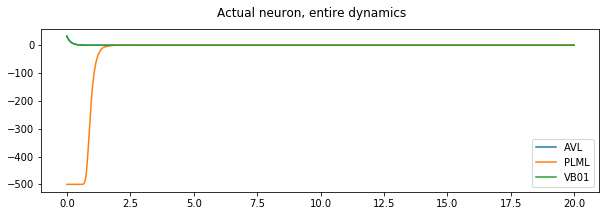

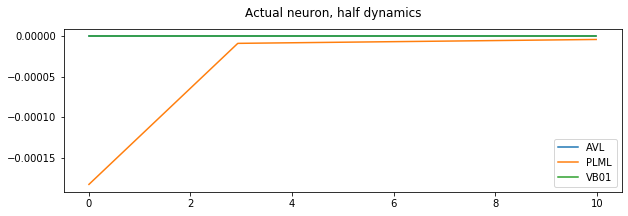

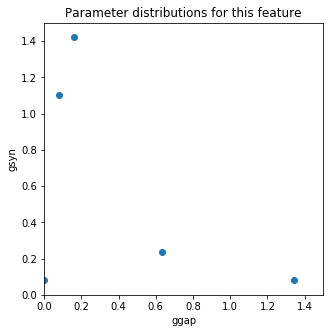

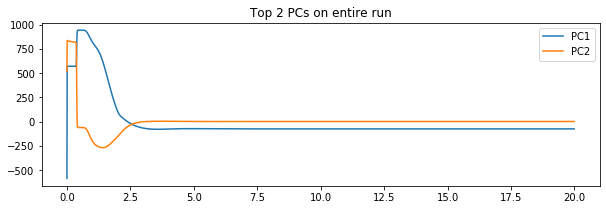

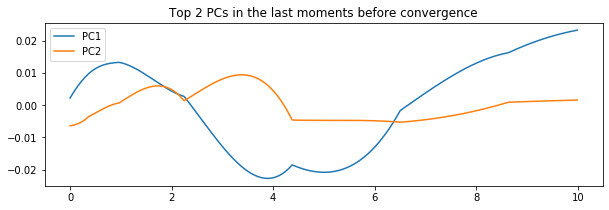

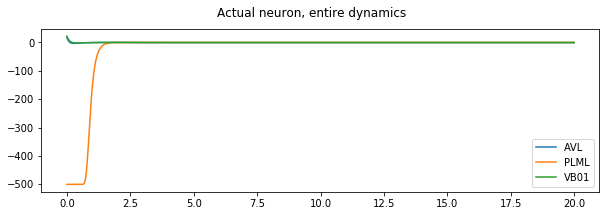

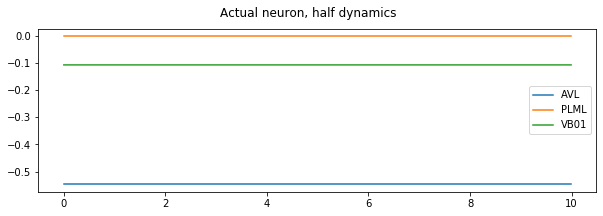

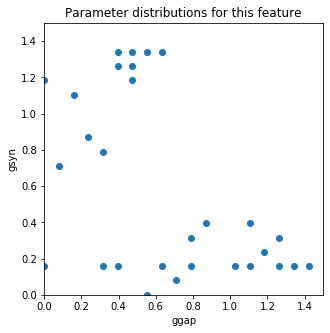

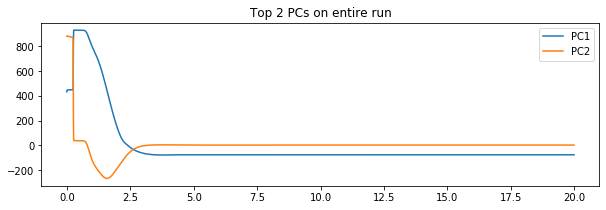

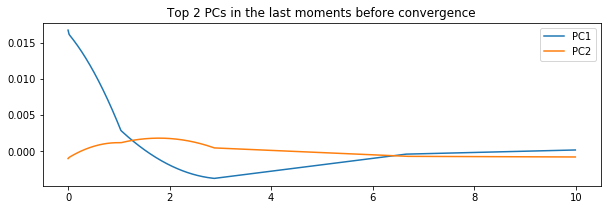

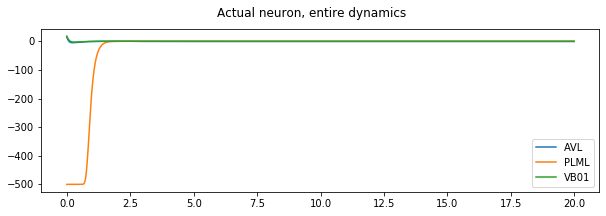

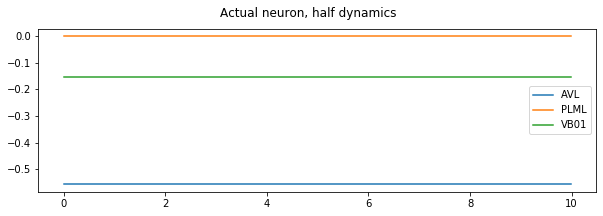

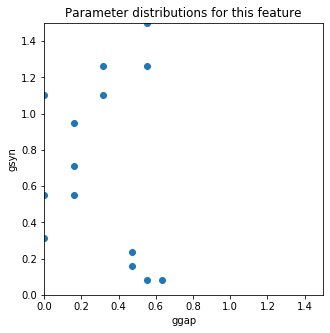

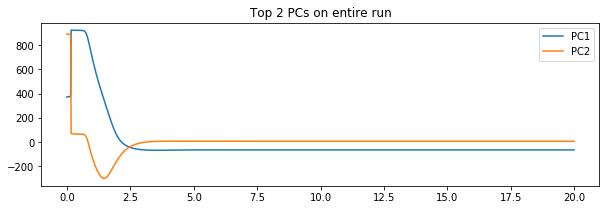

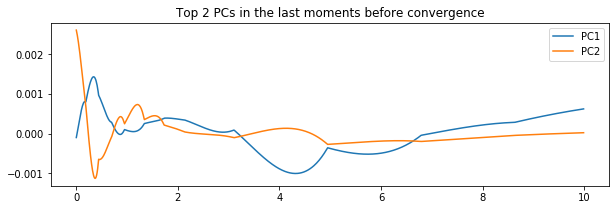

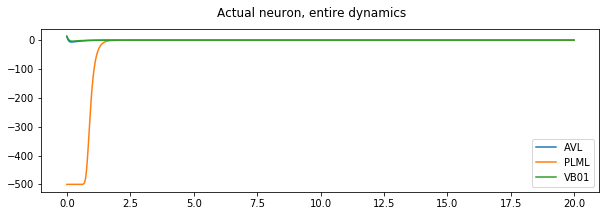

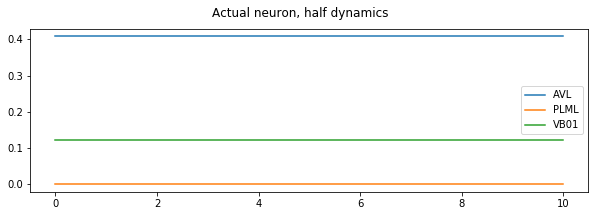

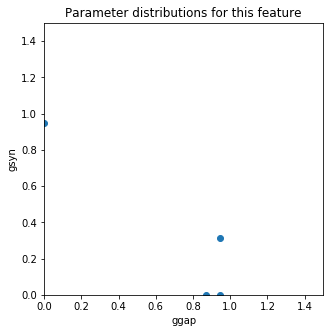

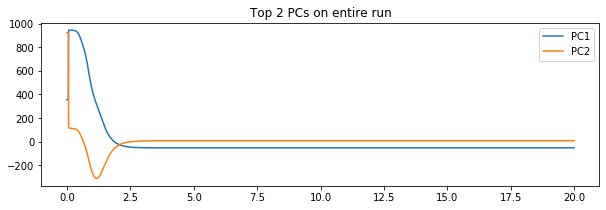

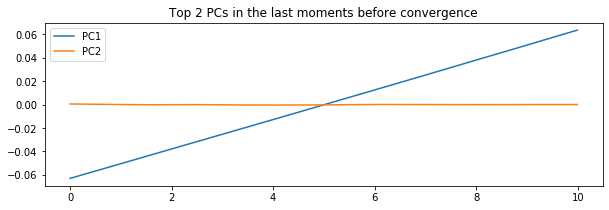

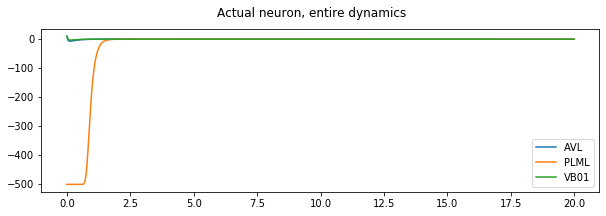

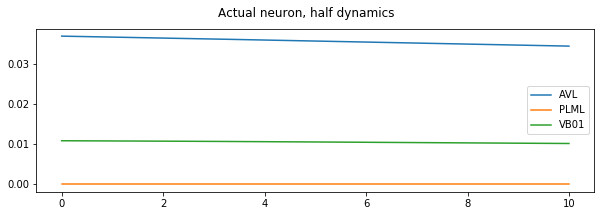

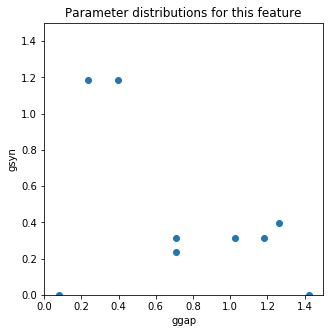

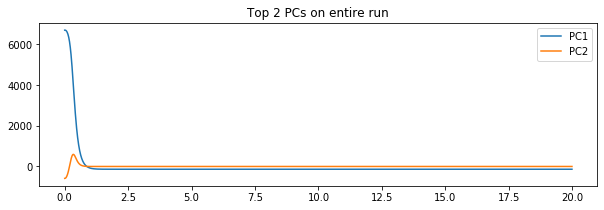

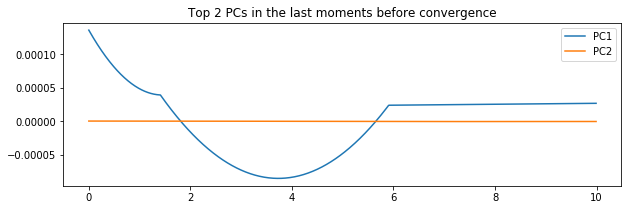

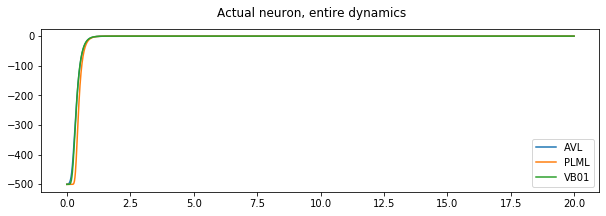

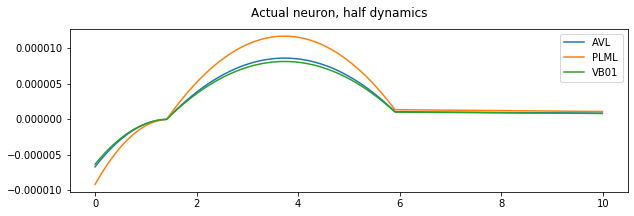

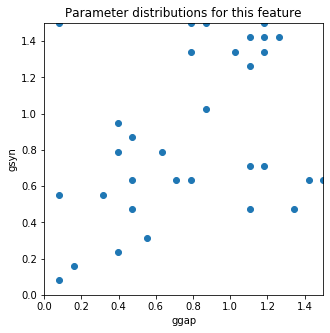

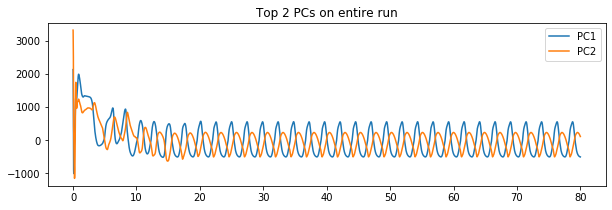

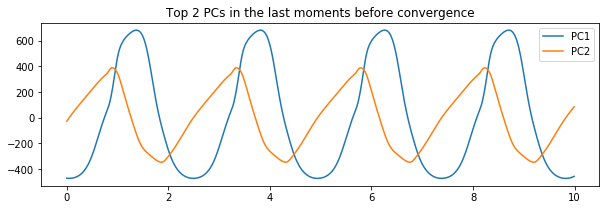

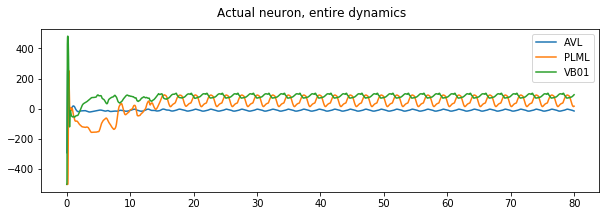

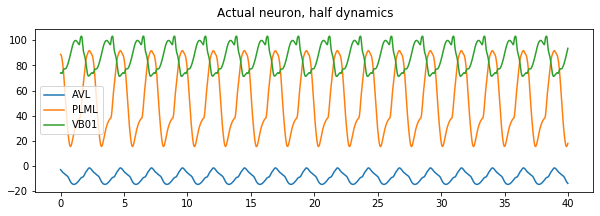

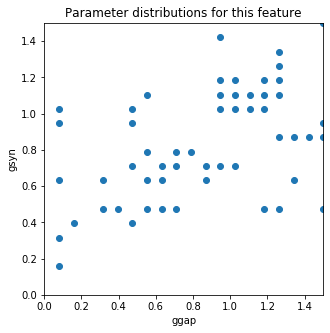

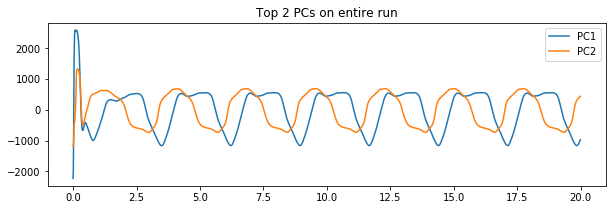

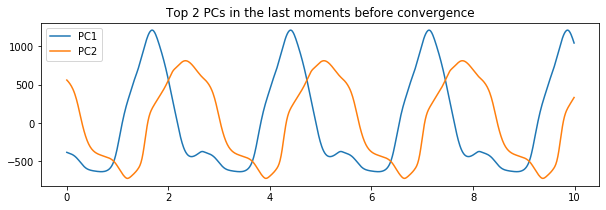

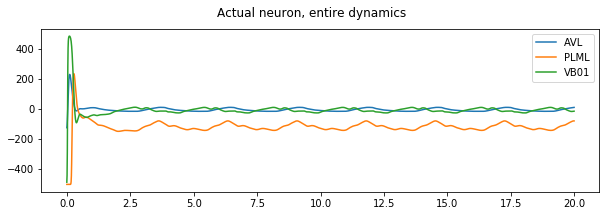

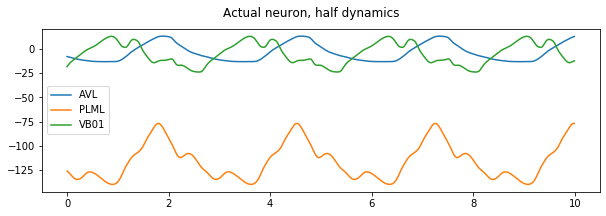

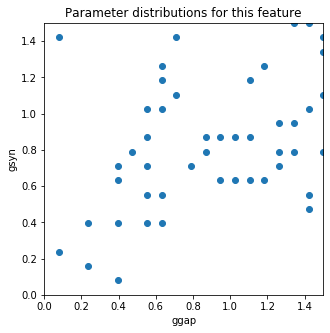

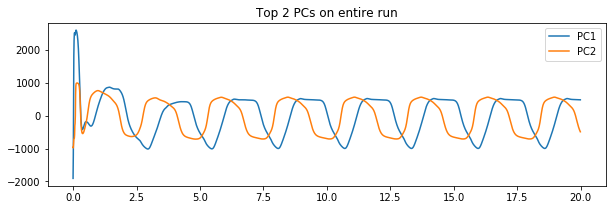

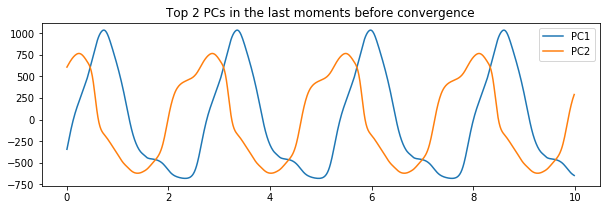

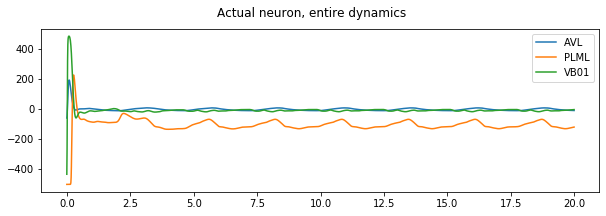

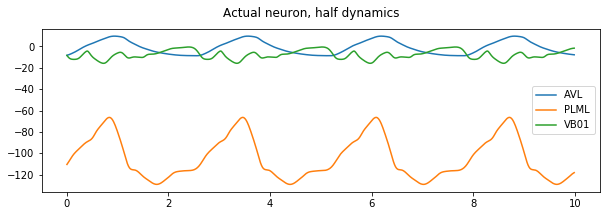

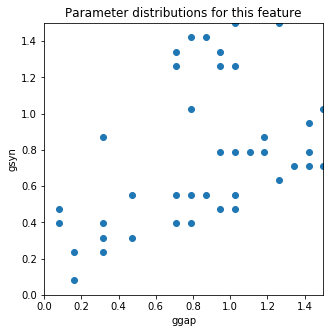

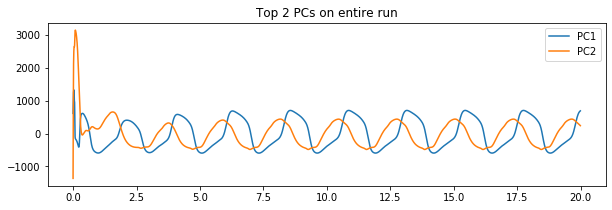

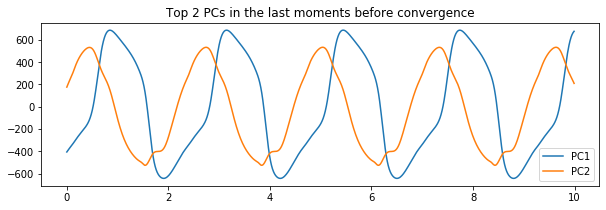

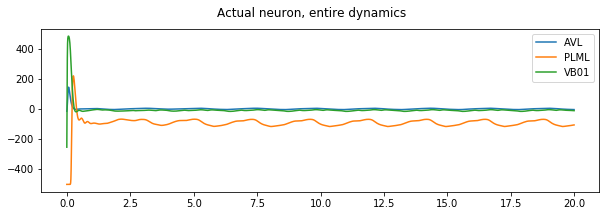

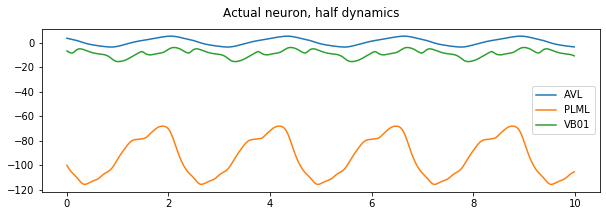

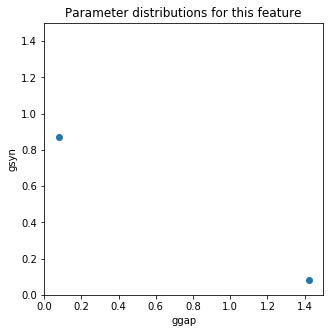

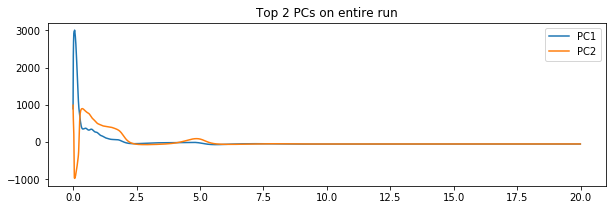

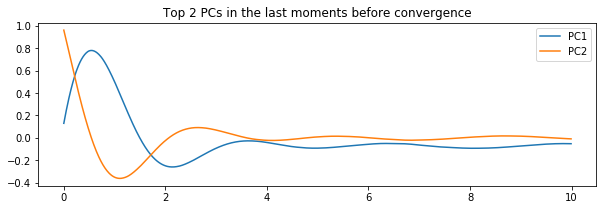

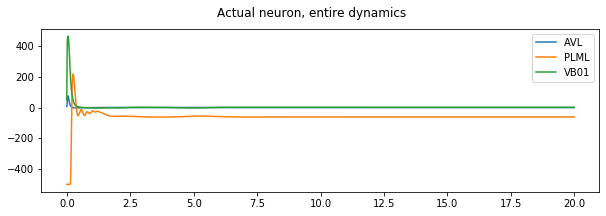

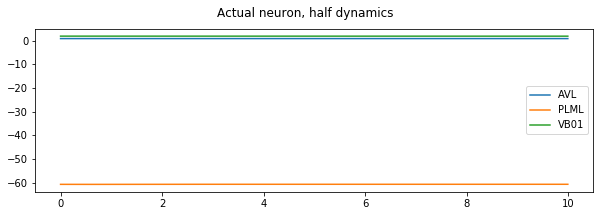

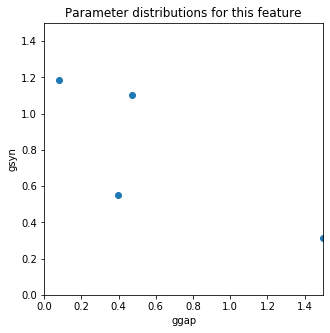

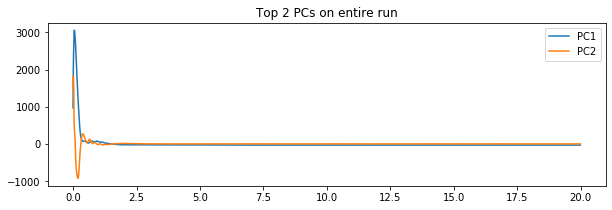

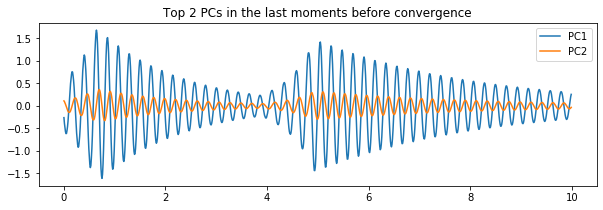

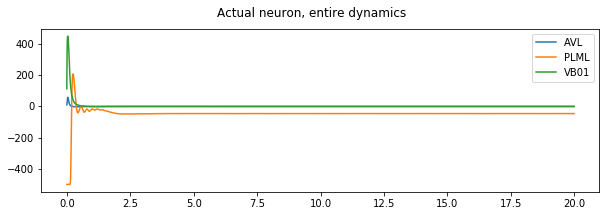

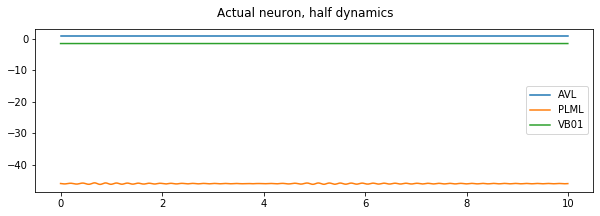

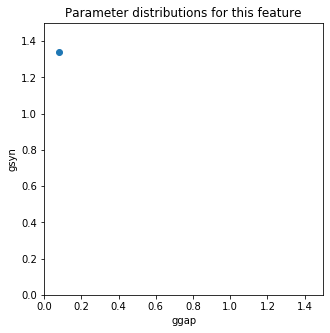

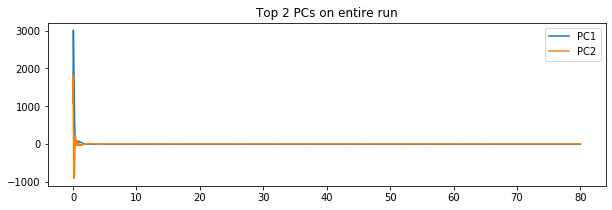

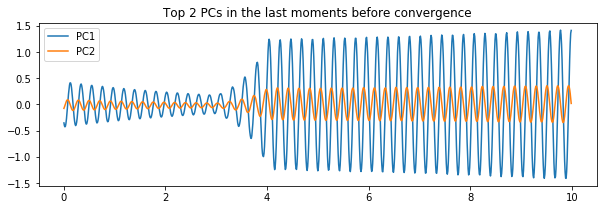

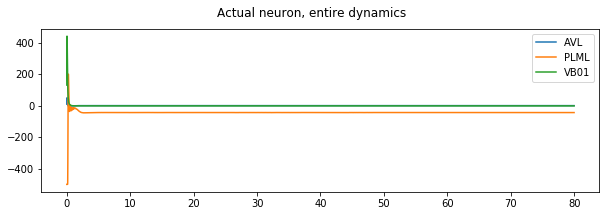

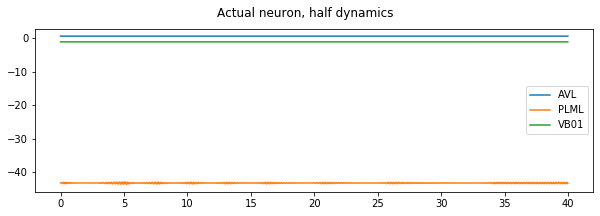

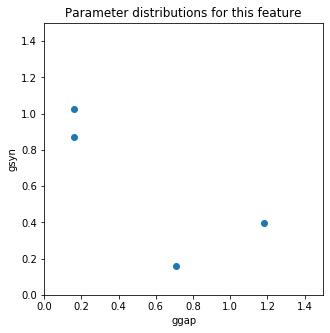

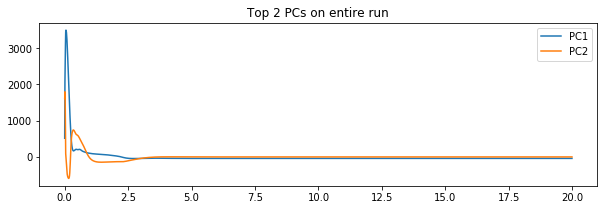

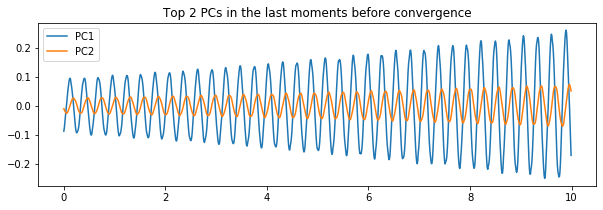

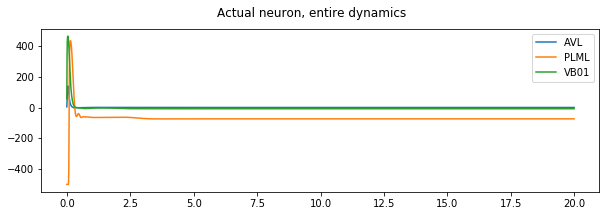

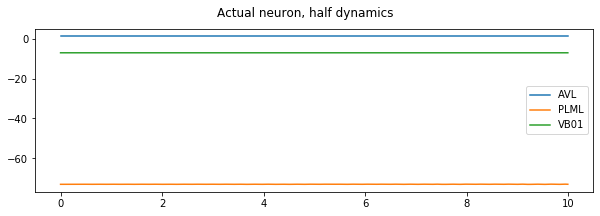

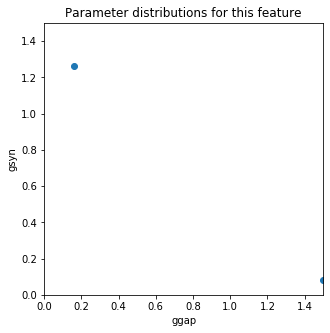

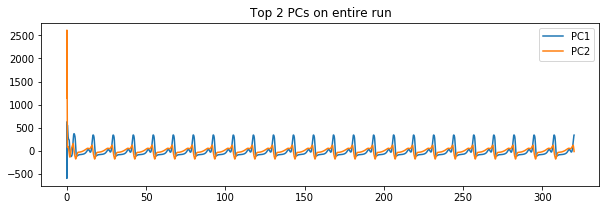

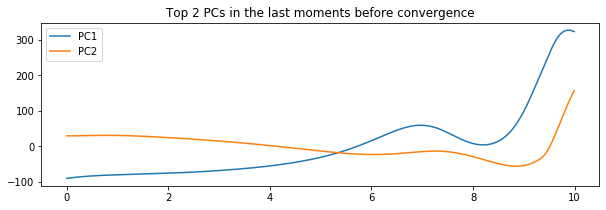

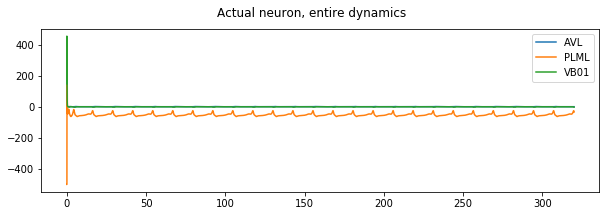

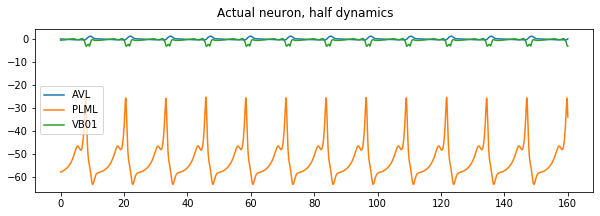

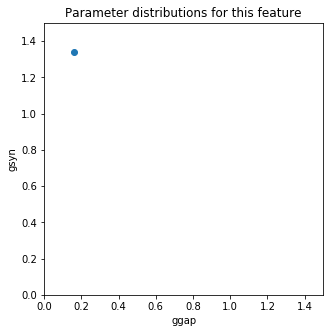

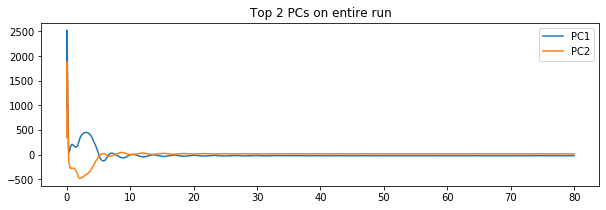

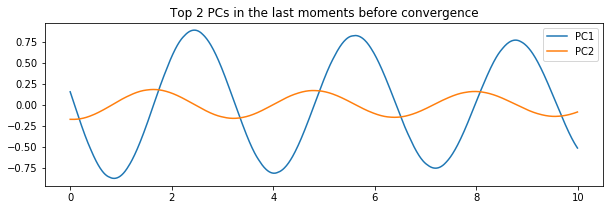

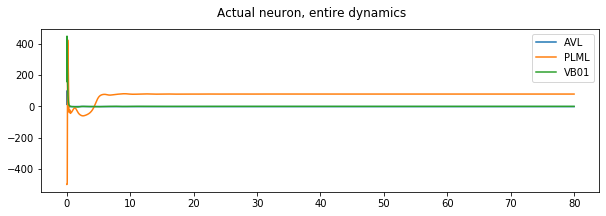

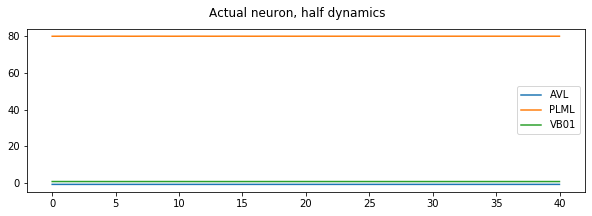

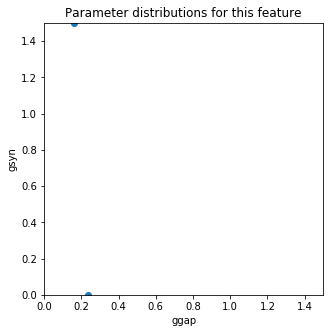

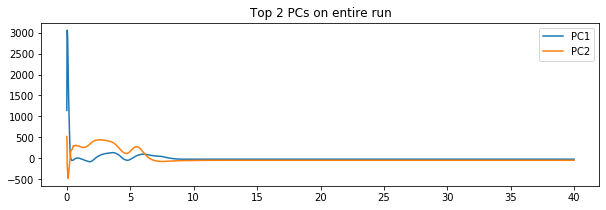

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for feature, params in features_to_params.items():
  i += 1
  params = features_to_params[feature]
  sample_param = params[0]
  ggap = sample_param[0]
  gsyn = sample_param[1]

  all_dynamics = simulate_until_stable(C_actual, Gc_actual, ggap, gsyn)
  last_n = 1000
  n = all_dynamics.shape[0]
  last_dynamics = all_dynamics[-last_n:,:]
  pca = PCA()
  all_X = all_dynamics - all_dynamics.mean(axis= 0)
  projected_all_X = pca.fit_transform(all_dynamics)
  X = last_dynamics - last_dynamics.mean(axis= 0)
  projected_X = pca.fit_transform(last_dynamics)
  dom_mode = projected_X[:,0]

  center_of_mass_shift = get_center_of_mass_shift(dom_mode)
  amplitude_shift = get_amplitude_shift(dom_mode)
  amplitude = get_amplitude(dom_mode)
  print(("{0} Center of mass shift bucket = {1}, amplitude shift bucket = {2}, amplitude = bucket {3},"
    + " number of params = {4}").format(
      i, feature[0], feature[1], feature[2], len(params)))
  print("Sample parameter. ggap {0}, gsyn {1}".format(ggap, gsyn))
  print("Center of mass shift = {0:.2f}".format(center_of_mass_shift))
  print("Amplitude shift = {0:.2f}".format(amplitude_shift))
  print("Amplitude = {0:.2f}".format(amplitude))

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
  ggaps = []
  gsyns = []
  for param in params:
    ggaps.append(param[0])
    gsyns.append(param[1])
  ax.scatter(ggaps, gsyns)
  ax.set_title("Parameter distributions for this feature")
  ax.set_xlabel("ggap")
  ax.set_ylabel("gsyn")
  ax.set_xlim(0, 1.5)
  ax.set_ylim(0, 1.5)
  display(fig)
  
  times = np.arange(0, n * 0.01 , 0.01)
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
  ax.plot(times, projected_all_X[:,0], label = "PC1")
  ax.plot(times, projected_all_X[:,1], label = "PC2")
  ax.legend()
  ax.set_title("Top 2 PCs on entire run")
  display(fig)

  times = np.arange(0, last_n * 0.01 , 0.01)
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
  ax.plot(times, projected_X[:,0], label = "PC1")
  ax.plot(times, projected_X[:,1], label = "PC2")
  ax.legend()
  ax.set_title("Top 2 PCs in the last moments before convergence")
  display(fig)

  fig = plot_saved_dynamics_collapsed(['AVL', 'PLML', 'VB01'], all_dynamics, neuron_metadata_collection)
  fig.suptitle("Actual neuron, entire dynamics")
  display(fig)
  fig = plot_saved_dynamics_collapsed(['AVL', 'PLML', 'VB01'], all_dynamics[int(-n/2):,], neuron_metadata_collection)
  fig.suptitle("Actual neuron, half dynamics")
  display(fig)